## 생능출판사 (가칭)"데이터과학 파이썬" 코드 13장

## 13.2 맷플롯립으로 간단히 이미지 그려보기

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('d:/data/mandrill.png')
print(img)

[[[0.45882353 0.41960785 0.21960784]
  [0.26666668 0.22352941 0.14509805]
  [0.42352942 0.36078432 0.20784314]
  ...
  [0.36862746 0.36078432 0.22745098]
  [0.5254902  0.50980395 0.33333334]
  [0.56078434 0.60784316 0.40784314]]

 [[0.42352942 0.36078432 0.20784314]
  [0.32941177 0.3019608  0.1764706 ]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.4117647  0.5019608  0.34901962]
  [0.36862746 0.35686275 0.29411766]
  [0.27450982 0.30588236 0.21176471]]

 [[0.45882353 0.41960785 0.21960784]
  [0.45882353 0.41960785 0.21960784]
  [0.32941177 0.3019608  0.1764706 ]
  ...
  [0.37254903 0.40392157 0.24313726]
  [0.28235295 0.27450982 0.1764706 ]
  [0.47058824 0.5372549  0.3529412 ]]

 ...

 [[0.3647059  0.46666667 0.4117647 ]
  [0.44705883 0.5803922  0.6117647 ]
  [0.52156866 0.5686275  0.6039216 ]
  ...
  [0.36078432 0.41960785 0.34509805]
  [0.39215687 0.36078432 0.36078432]
  [0.32941177 0.32156864 0.28627452]]

 [[0.44705883 0.5803922  0.6117647 ]
  [0.5254902  0.61960787 0.61960787]


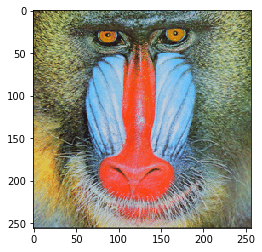

In [2]:
img_plot = plt.imshow(img)
plt.show()

## 13.3 좀 더 편리한 이미지 도구는 없을까

In [3]:
!pip install opencv-python

In [4]:
import cv2


img_gray = cv2.imread('d:/data/mandrill.png', cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread('d:/data/mandrill.png', cv2.IMREAD_COLOR)

cv2.imshow('grayscale', img_gray)
cv2.imshow('color image', img_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.4 OpenCV로 이미지 다루어 보자

In [5]:
import cv2
img = cv2.imread('d:/data/mandrill.png', 1)
cv2.line(img, (0,0), (200,200), (0,0,255), 5)
cv2.arrowedLine(img, (0,200), (200,20), (0,0,255), 5)
cv2.imshow('lined', img)
cv2.waitKey(0)

-1

In [6]:
cv2.rectangle(img, (0,200), (200,20), (0,0,0), 5)
cv2.putText(img, "hello", (70,70), fontFace = 2, fontScale = 1, color = (0,0,0))

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 58,  92,  94],
        [ 85, 130, 134],
        [104, 155, 143]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 89, 128, 105],
        [ 75,  91,  94],
        [ 54,  78,  70]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 62, 103,  95],
        [ 45,  70,  72],
        [ 90, 137, 120]],

       ...,

       [[105, 119,  93],
        [156, 148, 114],
        [154, 145, 133],
        ...,
        [ 88, 107,  92],
        [ 92,  92, 100],
        [ 73,  82,  84]],

       [[156, 148, 114],
        [158, 158, 134],
        [137, 146, 119],
        ...,
        [ 92,  92, 100],
        [ 92,  92, 100],
        [ 75,  91,  94]],

       [[ 87,  91,  73],
        [ 71,  73,  61],
        [ 58,  70,  60],
        ...,
        [ 36,  46,  47],
        [ 36,  46,  47],
        [ 44,  38,  42]]

## 13.5 합성 사진을 제작해 보자

In [7]:
import cv2
global img1, img2

def on_change_weight(x):
    weight = x / 100
    img_merged = cv2.addWeighted(img1, 1-weight, img2, weight, 0)
    cv2.imshow('Display', img_merged)

cv2.namedWindow('Display')
cv2.createTrackbar('weight', 'Display', 0, 100, on_change_weight)

img1 = cv2.imread('d:/data/green_back.png')
img2 = cv2.imread('d:/data/iceberg.jpg')
img1 = cv2.resize(img1, (300,400))
img2 = cv2.resize(img2, (300,400))

cv2.imshow('Display', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 13.6 이미지에 마스크를 씌워볼까

In [8]:
import cv2
mask_image = cv2.imread('d:/data/mask_python.png')
back_image = cv2.imread('d:/data/iceberg.jpg')
mask_image = cv2.resize(mask_image, (300,400))
back_image = cv2.resize(back_image, (300,400))

mask_ANDed = cv2.bitwise_and(mask_image, back_image)
mask_ORed = cv2.bitwise_or(mask_image, back_image)
mask_XORed = cv2.bitwise_xor(mask_image, back_image)
mask_Inverted = cv2.bitwise_and(cv2.bitwise_not(mask_image), back_image)

cv2.imshow('mask', mask_image)
cv2.imshow('back', back_image)
cv2.imshow('mask and', mask_ANDed)
cv2.imshow('mask or', mask_ORed)
cv2.imshow('mask xor', mask_XORed)
cv2.imshow('mask inv', mask_Inverted)

cv2.waitKey(0)


-1

## 13.7 원하는 색깔 픽셀만 뽑아 보자

In [9]:
import numpy as np
import cv2

image = cv2.imread('d:/data/mandrill.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

blue_low = np.array([80, 0, 0])
blue_high = np.array([130, 255, 255])

mask = cv2.inRange(image_hsv, blue_low, blue_high)

cv2.imshow('original', image)
cv2.imshow('mask', mask)
cv2.waitKey(0)


-1

In [10]:
extracted = cv2.bitwise_and(image, image, mask=mask)

## 13.8 이미지에 필터를 씌워 보자

In [11]:
import numpy as np
import cv2

org = cv2.imread('d:/data/mandrill.png', 1)

kernel1 = np.ones((3,3), np.float32) / 9
kernel2 = np.ones((9,9), np.float32) / 81

averaged33 = cv2.filter2D(org, -1, kernel1)
averaged99 = cv2.filter2D(org, -1, kernel2)

cv2.imshow('original', org)
cv2.imshow('filtered1', averaged33)
cv2.imshow('filtered2', averaged99)

cv2.waitKey(0)


-1

## 13.9 OpenCV로 이미지 필터링하기

In [12]:
import numpy as np
import cv2

org = cv2.imread('d:/data/mandrill.png', 1)

averaged33 = cv2.GaussianBlur(org, (3,3), 1)
averaged99 = cv2.GaussianBlur(org, (9,9), 1)

cv2.imshow('original', org)
cv2.imshow('Gaussian 33', averaged33)
cv2.imshow('Gaussian 99', averaged99)
cv2.waitKey(0)


-1

## 13.10 다양한 흐림 필터로 잡음을 제거해 보자

In [13]:
import numpy as np
import cv2

original_image = cv2.imread('d:/data/mandrill.png', 1)
result_image1 = cv2.GaussianBlur(original_image,  (9,9), 1)
result_image2 = cv2.medianBlur(original_image,  9)
result_image3 = cv2.bilateralFilter(original_image,  9, 50, 50)


## 13.11 관심있는 곳만 남겨보자

In [14]:
import cv2
global color_image, gray_image

# 트랙바가 변경되면 그 값을 임계치로 회색조 이미지를 이진화하여 창에 그림
def on_change_threshold(x):
   _, th_image = cv2.threshold(gray_image, x, 255, cv2.THRESH_BINARY)
   cv2.imshow('Thresholding', th_image)

# 윈도를 생성함
cv2.namedWindow('Thresholding')
cv2.createTrackbar('threshold', 'Thresholding', 0, 255, on_change_threshold)

# 촛불 이미지를 읽고, 회색조 이미지를 준비함
color_image = cv2.imread('d:/data/candles.jpg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# 처음에는 원본 이미지를 그림 (트랙바를 변경하면 임계치에 따라 이진화 결과 출력)
cv2.imshow('Thresholding', color_image)

cv2.waitKey(0)


-1

In [15]:
# image를 회색조로 읽어들인다.
img_gray = cv2.imread('d:/data/green_back.png', cv2.IMREAD_GRAYSCALE)

# adaptiveThreshold를 적용한다
# 주변 9x9 픽셀 공간의 평균값 - 5가 임계치가 되고, 이보다 크면 255, 그렇지 않으면 0
img_edge = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,   blockSize=9,   C= 0)

# 결과는 윤곽선 픽셀이 드러난다
cv2.imshow('edge', img_edge)
cv2.waitKey(0)

-1

## 13.12 윤곽선을 더 잘 뽑아 낼 수 있을까

In [16]:
img = cv2.imread('d:/data/book.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('gray', gray)
cv2.imshow('binary', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()


## LAB13-1
## 합성 사진 만들기


In [17]:
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) # HSV 공간으로 
l_bound = np.array([40, 100, 50])               # 녹색 색상 하한
u_bound = np.array([80, 255, 255])              # 녹색 색상 상한

mask = cv2.inRange(img_hsv, l_bound, u_bound)   # 녹색 픽셀 찾기
mask_inv = cv2.bitwise_not(mask)                # 녹색 아닌 픽셀 찾기

In [18]:
import numpy as np
import cv2

img1 = cv2.imread('d:/data/green_back.png')   # 전경 이미지 읽기
img2 = cv2.imread('d:/data/iceberg.png')      # 배경 이미지 읽기

front_image = cv2.resize(mask_image, (300,400))
back_image = cv2.resize(back_image, (300,400))

img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV) # HSV 공간으로 옮김
l_bound = np.array([40, 100, 50])               # 녹색 색상의 하한
u_bound = np.array([80, 255, 255])              # 녹색 색상의 상한

In [19]:
mask = cv2.inRange(img_hsv, l_bound, u_bound)    # 녹색 픽셀 찾기
mask_inv = cv2.bitwise_not(mask)                 # 녹색이 아닌 픽셀 찾기

# 녹색 픽셀들만 추출하기
extracted = cv2.bitwise_and(front_image, front_image, mask = mask) 
# 녹색 아닌 픽셀만 추출하기
removed = cv2.bitwise_and(front_image, front_image, mask = mask_inv)   
# 녹색과 겹치는 배경 추출
background = cv2.bitwise_and(back_image, back_image, mask=mask)   
# 녹색 제거 전경 + 배경   
merged = cv2.bitwise_or(removed, background)
             
cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('removed', removed)
cv2.imshow('background', background)
cv2.imshow('merged', merged)

cv2.waitKey(0) 

-1

 
## LAB13-2
## 텍스트 데이터 추출을 위한 준비


In [20]:
img = cv2.imread('d:/data/book.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

cv2.imshow('gray', gray)
cv2.imshow('binary', thresh)

In [21]:
import numpy as np
import cv2

In [22]:
img = cv2.imread('d:/data/book.png')

# 잡음은 제거하면서 특징은 유지할 수 있는 양방향 필터 적용
blur_bilateral = cv2.bilateralFilter(img, 11, 75, 75)   

# 회색조로 변환
gray = cv2.cvtColor(blur_bilateral, cv2.COLOR_BGR2GRAY) 

# 인근 픽셀과 비교한 이진화
thresh = cv2.adaptiveThreshold(gray, 255,                            
         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 7)

cv2.imshow('original', img)
cv2.imshow('bilateral', blur_bilateral)
cv2.imshow('gray', gray)
cv2.imshow('binary', thresh)

cv2.waitKey(0)

-1